# Assignment 2 - Machine Learning Basics

## *Chang Shu*
Netid:  *cs530*

Github link: *https://github.com/wisophia/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

#### **ANSWER**

1. The flexible model will perform better. Since the observation size is extremely large and predictors is small, it less likely for it to be overfitting. It could reduce the bias of the model largely. Meanwhile, the variance just increase slightly.


2. The inflexible model will perform better. Since the sample size is small, a flexible model could lead to overfitting. As model become more flexible, variance will increase largely and bias will reduce just a little bit.


3. The flexible model will perform better. A flexible model do not have explicit assumptions about functional form of f, so it is possible for flexible model to accurately fit a wider range of possible shapes for f and capture curvature better. As model become more flexible, both variance and bias will decrease largely.


4. The inflexible model will perform better. Since the variance of the error terms is extremely high, a flexible model might fit the noises too much and cause overfitting. Then the variance will increase largely and bias just reduce and soon converge with variance and become horizontal. 


## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

*Suppose we don't need to treat the index as a predictor, like the firms name in (a), product id in (b) and the week index in (c).*

**(a)** 

1. A regression problem.
2. We are most interested in inference in this problem.
3. Sample size $n$ is $500$, numbers of predictors $p$ is $3$.

**(b)**
1. A classification problem.
2. We are most interested in prediction in this problem.
3. Sample size $n$ is $20$, numbers of predictors $p$ is $13$.

**(c)**
1. A regression problem.
2. We are most interested in inference in this problem.
3. Sample size $n$ is $52$ (real-life statistics), numbers of predictors $p$ is $3$.


# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [299]:
# (a) Write your own kNN classifier
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [240]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

**(a)** Here is the code and table.

In [154]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

In [155]:
#compute Euclidean distance 
import pandas as pd

X0 = np.zeros((6,3))
dist0 = np.sqrt(np.sum((X-X0)**2, axis=1))  

#display the distance in a dataframe
dist_df = pd.DataFrame(dict( Obs = [1,2,3,4,5,6], x1 = [0,2,0,0,-1,1], x2 = [3,0,1,1,0,1], x3 = [0,0,3,2,1,1], y = ['r','r','r','b','b','r'], Distance = dist0))
dist_final = dist_df.set_index('Obs')
dist_final

,x1,x2,x3,y,Distance
Obs,,,,,
1,0,3,0,r,3.000000
2,2,0,0,r,2.000000
3,0,1,3,r,3.162278
4,0,1,2,b,2.236068
5,-1,0,1,b,1.414214
6,1,1,1,r,1.732051


**(b)**

In [167]:
from statistics import mode

def knn(y,k):
    knnlist = []
    sort_list = sorted(list(dist0))
    for i in range(k):
        knnlist.append(y[list(dist0).index(sort_list[i]), ])
    color = mode(knnlist)
    print (color)
    return (color)

**(b)**

In [170]:
knn(y,1)

b


'b'

Our prediction for K = 1 is "Blue". K = 1 means that we need to find the nearest 1 neighboor, and assign its color label to new data point, which is "Blue".

**(c)**

In [169]:
knn(y,3)

r


'r'

Our prediction for K = 3 is "Red". K = 3 means that we need to find the nearest 3 neighboor, and assign the color most frequently to new data point, which is "Red".

**(d)**
If Bayes Decision Boundary is highly non-linear, then we expect K to be small. When K is small, the classifier could be influened largely by several data points that "near" itself, the boundary would be less smooth compared to the boundary of bigger K, especially when the dataset has high variance. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)**

In [296]:
#(a)
from sklearn.datasets import make_moons

sample1 = make_moons(n_samples=1000, noise =0.35)
sample2 = make_moons(n_samples=1000, )

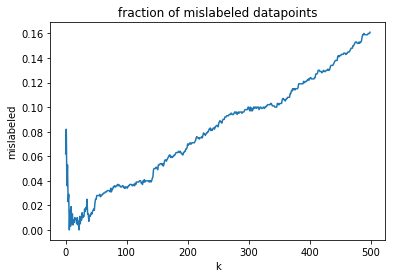

In [300]:
#(b)
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x1 = sample1[0]
y1 = sample1[1]

x2 = sample2[0]
y2 = sample2[1]

mislabled = []
n = 500

for k in range(1, n+1):
    knn = KNeighborsClassifier(k)
    knn.fit(x1, y1)
    err_rate = 1-accuracy(knn.predict(x2), y2)
    mislabled.append(err_rate)
    
plt.plot(mislabled)
plt.xlabel('k')
plt.ylabel('mislabeled')
plt.title('fraction of mislabeled datapoints')
plt.show() 


In [ ]:
**(c)**


**(b)**

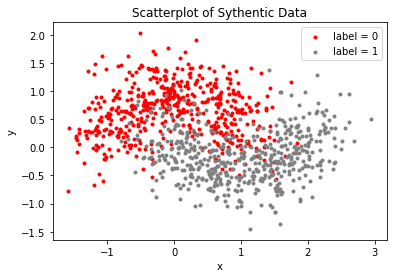

In [147]:
import matplotlib.pyplot as plt
x = rd_0[:,0]
y = rd_0[:,1]

plt.scatter(x[label == 0], y[label == 0], c = "red", label = "label = 0", marker = ".")
plt.scatter(x[label == 1], y[label == 1], c = "grey", label = "label = 1", marker = ".")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of Sythentic Data")
plt.legend()
plt.show()

**(c)**

In [184]:
import numpy.random as rd
# find random 300 index
index1 = rd.choice(1000,100)
index2 = rd.choice(1000,100)
index3 = rd.choice(1000,100)

# create 3 dateset from previous 1000 samples
train1x = rd_0[index1]
train1y = label[index1]

train2x = rd_0[index2]
train2y = label[index2]

train3x = rd_0[index3]
train3y = label[index3]

# fit K-Nearest Neighbor classifiers
from sklearn.neighbors import KNeighborsClassifier as KNN

#K=1
neigh = KNN(n_neighbors=1)
train1_k1 = neigh.fit(train1x,train1y)
train2_k1 = neigh.fit(train2x,train2y)
train3_k1 = neigh.fit(train3x,train3y)

#K=2
neigh = KNN(n_neighbors=25)
train1_k25 = neigh.fit(train1x,train1y)
train2_k25 = neigh.fit(train2x,train2y)
train3_k25 = neigh.fit(train3x,train3y)

#K=3
neigh = KNN(n_neighbors=50)
train1_k50 = neigh.fit(train1x,train1y)
train2_k50 = neigh.fit(train2x,train2y)
train3_k50 = neigh.fit(train3x,train3y)

**(d)**

In [189]:
import pylab as pl
from sklearn import neighbors, datasets

# set step size in the mesh
h = 0.02 

# creat test datasets and plot the decision boundary 
def boundary_plot(loca,s,k):
    for i in (1,2,3):
        x_mini, x_maxi = trainix[:,0].min() - .5, trainix[:,0].max() + .5
        y_mini, y_maxi = trainix[:,1].min() - .5, trainix[:,1].max() + .5
        xxi, yyi = np.meshgrid(np.arange(x_mini, x_maxi, h), np.arange(y_mini, y_maxi, h))
        for j in (1,25,50):
            Zi_j = traini_kj.predict(np.c_[xxi.ravel(), yyi.ravel()])
            loca.scatter(xxi.ravel(),yyi.ravel(), c = c, cmap = cmap_light)
            loca.legend()
            loca.set_title('Sample set{} with K ={}'.format(s,k))

NameError: name 'trainix' is not defined

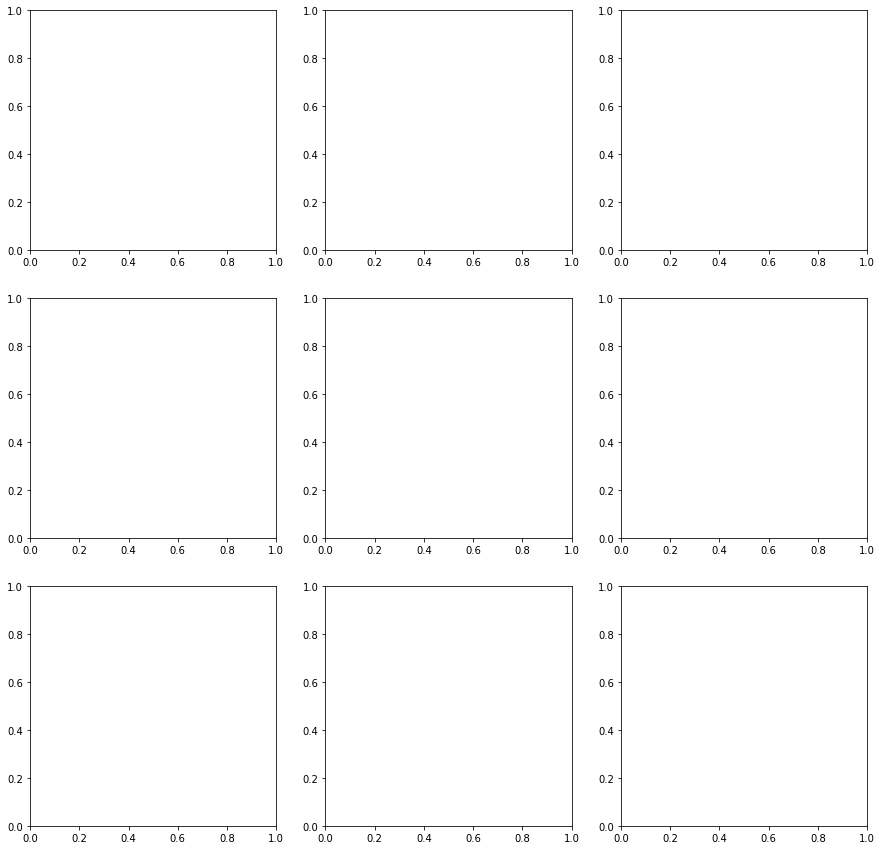

In [191]:
fig, axes = plt.subplots(3,3, figsize = (15,15))
boundary_plot(axes[0,0],1,1)
fig.suptitle("Decision Boundaries plot of different samples with different K value")
plt.show()

**(e)**

For each column, as datasets changes(there are all subsets from the same datasets containing 1000 observations), decision bounday pattern looks similar. For each row, as k increases, the boundary becomes smoother and close to linear boundary. The reason why it is this way is that when k increases, the flexibility of model decreases.
The best decision boundary was generated by $K = 25$. It is neither too general as K=50, nor too easily influenced by particular points near. The decision boundary with $K = 1$ is the one vary the most as the data change.

**(f)**

Bias-variance tradeoff means that for the same sample, change K from 1 to 25 and 50, the flexibility of model decreases, the variances decreases, and the bias grows bigger.
When changing K from 1 to 50, the model become less senstive to training data and could capture more general features of training dataset. This change leads to lower variance and higher bias. 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [193]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

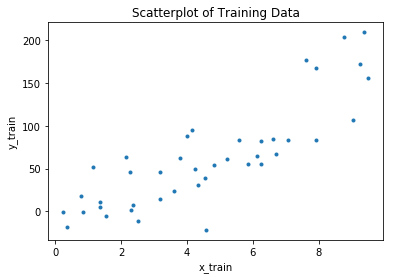

In [197]:
##a
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train,marker = ".")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.title("Scatterplot of Training Data")
plt.show()

In [226]:
##b
import numpy as np
from sklearn.linear_model import LinearRegression as lg
from sklearn.metrics import mean_squared_error

x_train_new = np.array(x_train).reshape(-1,1)
y_train_new = np.array(y_train).reshape(-1,1)
reg = lg().fit(x_train_new,y_train_new)
pre_train = reg.predict(x_train_new)
print ('The estimated model is: y = %f + %f * x' % (reg.intercept_, reg.coef_))
print ('The R-square of the model is: %f' % (reg.score(x_train_new,y_train_new)))
print ('The MSE of the model is: %f' % mean_squared_error(pre_train,y_train_new))

The estimated model is: y = -21.730783 + 18.303207 * x
The R-square of the model is: 0.701459
The MSE of the model is: 1052.585366


In [266]:
##c
# From the scatter plot, I decide to conduct quadratic transformation to x_train_new
x_train_trans = np.c_[x_train_new, np.square(x_train_new)]
reg_trans = lg().fit(x_train_trans,y_train_new)
pre_train_trans = reg_trans.predict(x_train_trans)
print ('The estimated model is: y = %f + %f * x + %f*x^2' % (reg_trans.intercept_, reg_trans.coef_[0][0],reg_trans.coef_[0][1]))
print ('The R-square of the model is: %f' % (reg_trans.score(x_train_trans,y_train_new)))
print ('The MSE of the model is: %f' % mean_squared_error(pre_train_trans,y_train_new))

The estimated model is: y = 8.007337 + 0.471007 * x + 1.832082*x^2
The R-square of the model is: 0.749048
The MSE of the model is: 884.797760


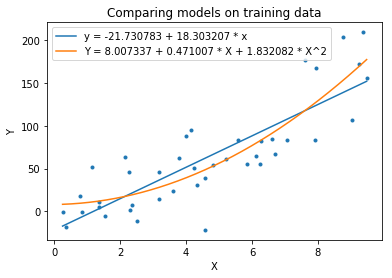

In [291]:
## d
# make prediction point
x_pred = np.linspace(min(x_train),max(x_train), 1000).reshape(-1,1)
x_pred_trans = np.c_[x_pred, x_pred**2]

y_pred = reg.predict(x_pred)
y_pred_trans = reg_trans.predict(x_pred_trans)

plt.scatter(x_train, y_train, marker='.')
plt.plot(x_pred, y_pred, label = 'y = -21.730783 + 18.303207 * x')
plt.plot(x_pred, y_pred_trans, label = 'Y = 8.007337 + 0.471007 * X + 1.832082 * X^2' )
plt.title("Comparing models on training data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [294]:
## e
x_test_new = np.array(x_test).reshape(-1,1)
x_test_trans = np.c_[x_test_new, np.square(x_test_new)]
y_test_new = np.array(y_test).reshape(-1,1)

# apply the transformed model to test data
pred_trans_test = reg_trans.predict(x_test_trans)

# apply the original model to test data
pred_test = reg.predict(x_test_new)

print('R square of the transformed model applied to test data is %f' % (reg_trans.score(x_test_trans,y_test_new)))
print ('Mean Square error of the transformed model applied to test data is %f' % (mean_squared_error(pred_trans_test,y_test_new)))
print('R square of the original model applied to test data is %f' % (reg.score(x_test_new,y_test_new)))
print ('Mean Square error of the original model applied to test data is %f' % (mean_squared_error(pred_test,y_test_new)))

R square of the transformed model applied to test data is 0.692782
Mean Square error of the transformed model applied to test data is 1398.881758
R square of the original model applied to test data is 0.555647
Mean Square error of the original model applied to test data is 2023.312109


**(f)** 

The transformed model perform better on both training data and test data. Since we could observe from the scatterplot of training data and test data, they both have a curve pattern, especially test data. When we add a quadratic term to the model, it could capture the curvation better than original model, both variance and bias would decrease. And R-squares and Mean Square errors of these model correspond to this trend as well, R^2 and MSE of transformed model is smaller than original model. 

**(g)** 
The predictive capability will decreased largely. Since the way we could make the model "learn" is our assumption that training data have very similar distribution as test data. If it is not the case, the model won't make sense at all.